In [1]:

library("aws.s3")

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
Sys.setenv("AWS_ACCESS_KEY_ID" = "636ac00bda25413eba590708f5fa128c", "AWS_SECRET_ACCESS_KEY" = "91c5d1854f6bbdf63e3e5f5ff564d220ab17975ad98c9391")
url <- "s3-api.us-geo.objectstorage.service.networklayer.com"
bucket <- "project1837cf7b98d4d48b89ef6ca5a37e8f5d2"
headers <- list(`x-amz-content-sha256`="e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b934ca495991b7852b855")

obj <- s3HTTP(
    verb = "GET",
    bucket = bucket,
    headers = headers,
    path = "Updated Master Data.csv",
    key = Sys.getenv("AWS_ACCESS_KEY_ID"),
    secret = Sys.getenv("AWS_SECRET_ACCESS_KEY"),
    check_region = FALSE,
    base_url = url)

df.data.1 <- read.csv(text = rawToChar(obj$content))
head(df.data.1)


geo_idx,YEAR,Cell,ENERGY,INTERNET,PATENT,HEALTH,MIL,INFANT,FEMEDU,GDPCAP,GDPGROWTH,POP,Category
1,1993,0.11593404,338.47540,0.025498253,2184,6.7,1.929473,44.6,6.4,3380.1284,3.0625488,1578.1222,Emerging
2,1993,0.05367264,62.55920,0.000170147,422,3.5,2.071665,40.2,6.1,536.3573,12.6969383,12029.8296,Emerging
3,1993,0.99630325,1933.63500,0.574086886,30413,10.4,3.283614,6.3,10.0,18822.6976,-1.0794842,577.4988,Developed
4,1993,2.19259004,1554.44600,0.462319739,0,10.1,1.853910,5.9,10.8,20344.2176,-1.6507664,806.7600,Developed
5,1993,0.00000000,48.65522,0.000218176,2027,4.1,2.827158,81.7,3.3,332.6057,2.7177655,9244.7563,Emerging
6,1993,2.12017489,989.39810,0.122689814,45587,7.2,2.004464,7.3,10.4,16817.5977,-0.9134017,570.9741,Developed


In [3]:
lmfit = lm(data=df.data.1, GDPGROWTH~POP+INFANT)

In [4]:
summary(lmfit)


Call:
lm(formula = GDPGROWTH ~ POP + INFANT, data = df.data.1)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.2378  -1.3283   0.0226   1.2608   8.1749 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.449e+00  2.943e-01   4.922 1.95e-06 ***
POP          6.122e-04  6.019e-05  10.170  < 2e-16 ***
INFANT      -2.616e-02  1.183e-02  -2.212   0.0283 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.735 on 177 degrees of freedom
Multiple R-squared:  0.3983,	Adjusted R-squared:  0.3915 
F-statistic: 58.57 on 2 and 177 DF,  p-value: < 2.2e-16


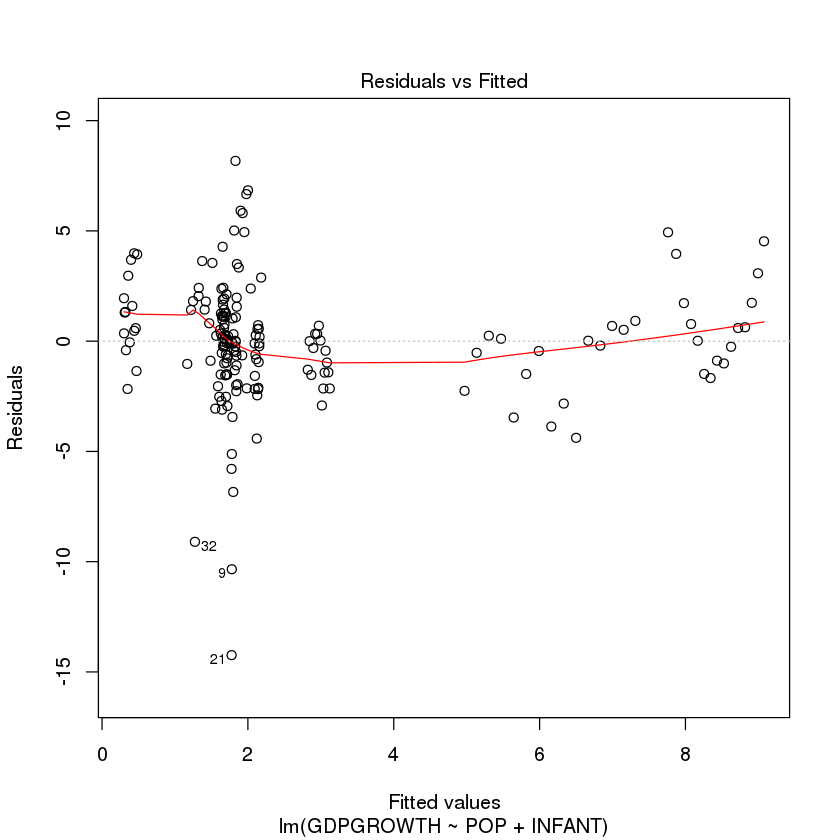

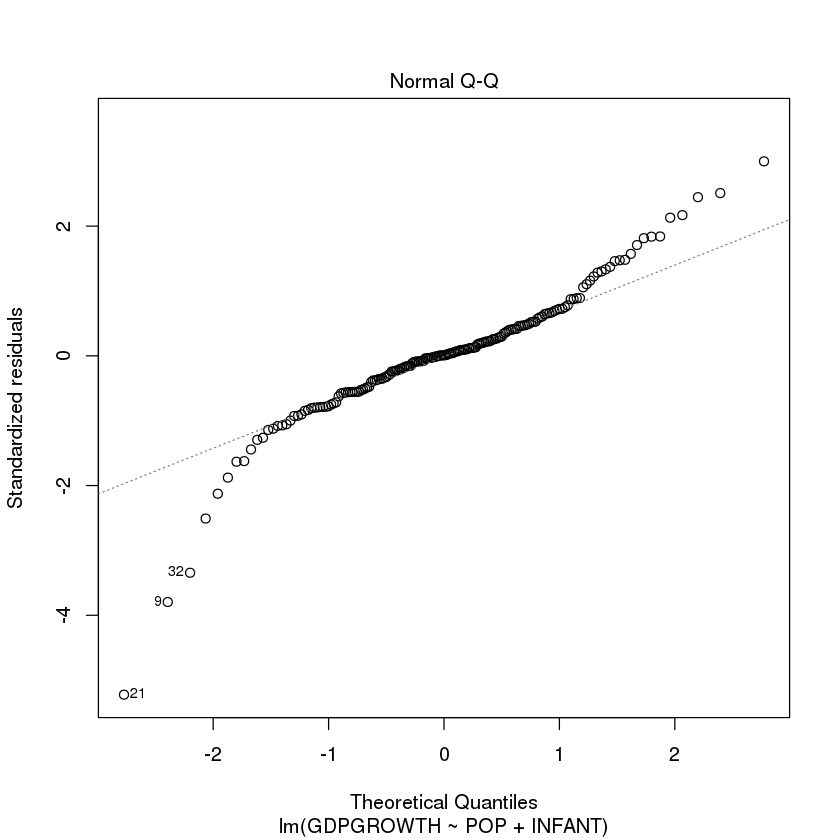

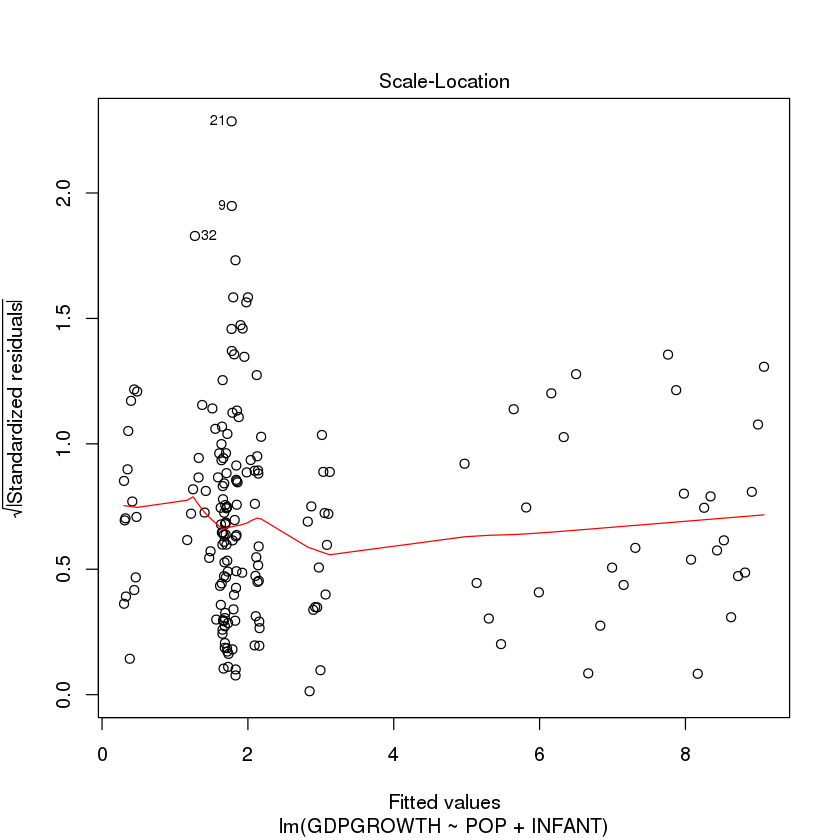

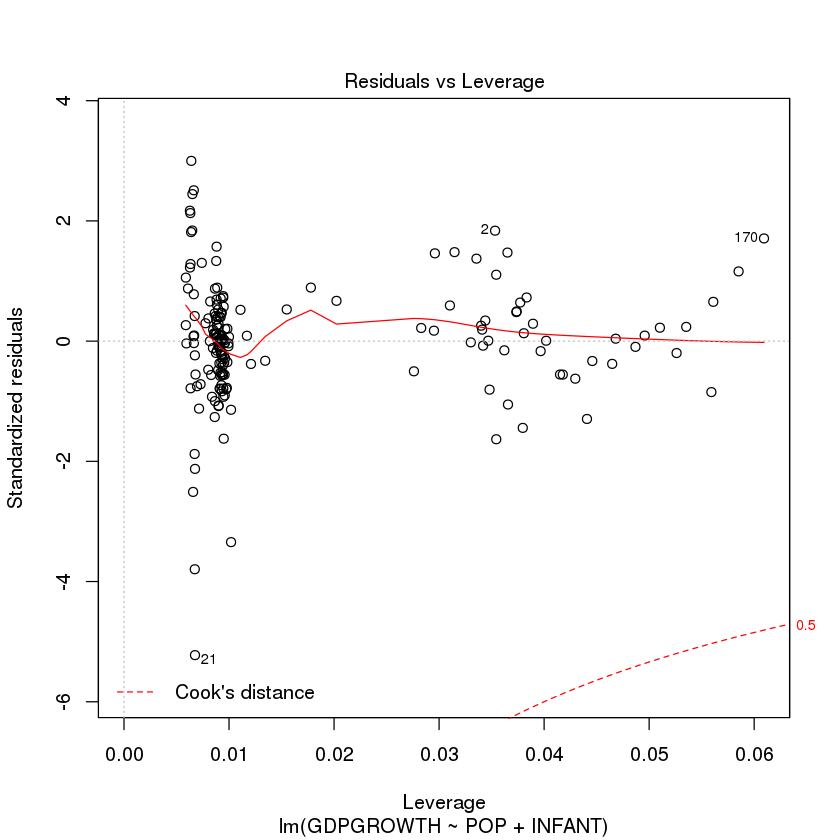

In [6]:
plot(lmfit)